# Data Project 3

# Summary

The purpose of our project is to investigate and predict the outcome of the 2024 presidential election in Virginia using ACS 5-year data from 2008-2020, providing quantitative insights into the precision of our prediction. The data is composed of voting data for Virginia from 2000 to 2020 (voting_VA.csv), county-level summary statistics (nhgis_county_data), and county adjacencies and populations (county_adjacencies.csv).  We chose to focus on three variables: sex by age, race, and ratio of income to poverty level as our predictive factors. We employed a random forest model, alongside exploratory data analysis tools such as scatterplots, residual plots, and feature importance plots to study how these variables influence electoral outcomes. Notably, in the feature importance plot, variables, all from the 2008-2012 dataset, such as the under .50 level for ratio of income to poverty level, females of 20 years old, and African American race were among the most significant features. Our model achieved an R-square value of approximately 0.447, indicating moderate prediction accuracy. Analysis of the map generated by the model revealed Republican dominance in large areas, while Democratic strongholds were concentrated in specific districts. Swing areas were identified as crucial in determining the final outcome. Strategies suggested for political parties included data-driven campaigning, local engagement, and targeted social media outreach. However, limitations such as model accuracy, non-response bias, the variability of poverty thresholds, and evolving political views highlight areas for improvement. Future enhancements could involve data about past candidates that could be studied for county-candidate interactions which could be useful in the case of a Biden-Trump rematch. Additionally, we could incorporate additional variables and broaden data collection methods to capture more nuanced voter behavior and preferences and draw from sources outside Virginia to leverage the limited observations per county to ultimately refine prediction accuracy and provide deeper insights into electoral dynamics.

# Data

The American Community Survey (ACS) is an integral component of the U.S. Census Bureau's Decennial Census Program, providing up-to-date demographic, socio-economic, and housing data throughout the decade. The ACS covers a comprehensive range of over 40 topics, encompassing education, language proficiency, immigration status, marital status, and migration patterns.

Each year, the ACS collects data through a random sample of approximately 3.5 million addresses across the country. It produces statistics for varying time periods, including 1-year, 3-year, and 5-year estimates, catering to the diverse needs of policymakers, researchers, and communities. In particular, the availability of 5-year estimates provide a robust dataset for our data analysis. These estimates cover a wide array of geographic areas across the entire country at different levels of specificity. This granularity enables researchers to delve into localized trends and patterns, facilitating nuanced analyses and informed decision-making across a range of fields.

For our project, we tried to predict the 2024 presidential outcome in Virginia using three key variables—sex by age, race, and ratio of income to poverty level—derived from the American Community Survey (ACS) 5-Year Data spanning 2008 to 2020. We used the data from the American Community Survey: 5-Year Data from the year ranges 2008-2012, 2012-2016, and 2016-2020, so that this way we had data to analyze from 4 different presidential election years. To analyze our data, we created and used a random forest model, created a scatterplot and residual plot, and a feature importance plot.

## Data Cleaning / Analysis Preparation

One of the challenges that we faced was cleaning the data to ensure consistency and compatibility across different ACS datasets (2008-2012, 2012-2016, and 2016-2020). This was crucial for meaningful analysis in our project, especially because there was such a large amount of data to work with, we needed to make sure that we properly narrowed down our scope and cleaned our data properly. Aggregating data at appropriate levels (e.g., state-level, county-level) is essential for conducting relevant analysis. Choosing the right level of aggregation ensures that the analysis captures meaningful variations and trends within the Virginia population and we wanted to look at county-level data to explore the deepest level of granularity that was possible. To start the process, we needed to solve the problem of cleaning the data we had from three separate files (for the different datasets), selecting the relevant data, and combining this data together correctly into one location. Since the data we had was from the same survey, just collected from different years, we had less trouble with combining these into a single table. Firstly, we had to look at the codebook in order to select the names of the relevant columns we needed for our data analysis. Next we had to parse through the three .csv files independently and put them into a list to concatenate them together into one single data frame. From then, we iteratively merged the data together into one big data frame from each year starting at 2020 and working in descending order. The only missing values we had were from the geographical data, which had 936 missing values. However, those do not actually affect our model and were only used for visualization.

## Relevant Variables

- Sex by Age: This metric provides information on the total population distribution based on sex and age groups. It helps in understanding demographic trends and voting behaviors across different age cohorts and genders. The age range spans from under five years old to 85 and over for both females and males.

- Race: Race data offers insights into the racial composition of the total population, which is crucial for understanding voting patterns and political preferences. It allows for analysis of voting behavior among different racial groups and their impact on election outcomes. The variable was split into categories of: White, Black, American Indian/Alaskan Native, Asian, Native Hawaiian/Other Pacific Islander, Some other race alone, two or more races with distinctions of including or excluding Some other race, and three or more races.

- Ratio of Income to Poverty Level: This variable measures the economic well-being of individuals or households by comparing their income to the poverty threshold which can help in analyzing socioeconomic disparities and their influence on electoral outcomes. Poverty status is determined by income and family size. This data was taken from the population for whom poverty status is determined. The range of ratio values are divided into six levels: under .50, .50 to .99, 1.00 to 1.24, 1.25 to 1.49, 1.50 to 1.84, 1.85 to 1.99, and 2.00 and over. A ratio less than 1 means that the income is less than the poverty level. When the ratio equals 1, the income and poverty level are the same, and when the ratio is greater than 1, the income is higher than the poverty level. For example, a value of .5 means that the person’s income is below 50% of poverty.

In [ ]:
import geopandas as gpd
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load data
gdf = gpd.read_file("./VirginiaAdministrativeBoundary_ClippedToShoreline.shp/VirginiaCounty_ClippedToShoreline.shx") # Load Virginia shapefile for maps
#gdf = gpd.read_file("./va_admin_bndry/VirginiaCounty_ClippedToShoreline.shx")
vdf = pd.read_csv('./data/voting_VA.csv') # Load historical voting data
cdf = pd.read_csv('./data/county_adjacencies.csv') # Load county adjacency data and population data

# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
df = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
#del gdf, cdf

In [ ]:
# 2012: 0002_ds191_20125_county_E.csv
# 2016: 0002_ds225_20165_county_E.csv
# 2020: 0002_ds249_20205_county_E.csv
csv_files = ["./data/county_data/0002_ds191_20125_county_E.csv", "./data/county_data/0002_ds225_20165_county_E.csv", "./data/county_data/0002_ds249_20205_county_E.csv"]

identifier_columns = ["STATE", "STATEA", "COUNTYA"]

# relevant columns: 2012 variables, 2016 variables, 2020 variables
# variable order: sex by age, race, ratio of income to poverty level in the past 12 months
# column names pertain to each cattegory of each variable, look at the codebook for more information
relevant_columns = [
    "QSEE001", "QSEE002", "QSEE003", "QSEE004", "QSEE005", "QSEE006", "QSEE007", "QSEE008", "QSEE009", "QSEE010", "QSEE011", "QSEE012", "QSEE013", "QSEE014", "QSEE015", "QSEE016", "QSEE017", "QSEE018", "QSEE019", "QSEE020", "QSEE021", "QSEE022", "QSEE023", "QSEE024", "QSEE025", "QSEE026", "QSEE027", "QSEE028", "QSEE029", "QSEE030", "QSEE031", "QSEE032", "QSEE033", "QSEE034", "QSEE035", "QSEE036", "QSEE037", "QSEE038", "QSEE039", "QSEE040", "QSEE041", "QSEE042", "QSEE043", "QSEE044", "QSEE045", "QSEE046", "QSEE047", "QSEE048", "QSEE049",
    "QSQE001", "QSQE002", "QSQE003", "QSQE004", "QSQE005", "QSQE006", "QSQE007", "QSQE008", "QSQE009", "QSQE010",
    "QUVE001", "QUVE002", "QUVE003", "QUVE004", "QUVE005", "QUVE006", "QUVE007", "QUVE008",
    "AF2AE001", "AF2AE002", "AF2AE003", "AF2AE004", "AF2AE005", "AF2AE006", "AF2AE007", "AF2AE008", "AF2AE009", "AF2AE010", "AF2AE011", "AF2AE012", "AF2AE013", "AF2AE014", "AF2AE015", "AF2AE016", "AF2AE017", "AF2AE018", "AF2AE019", "AF2AE020", "AF2AE021", "AF2AE022", "AF2AE023", "AF2AE024", "AF2AE025", "AF2AE026", "AF2AE027", "AF2AE028", "AF2AE029", "AF2AE030", "AF2AE031", "AF2AE032", "AF2AE033", "AF2AE034", "AF2AE035", "AF2AE036", "AF2AE037", "AF2AE038", "AF2AE039", "AF2AE040", "AF2AE041", "AF2AE042", "AF2AE043", "AF2AE044", "AF2AE045", "AF2AE046", "AF2AE047", "AF2AE048", "AF2AE049",
    "AF2ME001", "AF2ME002", "AF2ME003", "AF2ME004", "AF2ME005", "AF2ME006", "AF2ME007", "AF2ME008", "AF2ME009", "AF2ME010",
    "AF43E001", "AF43E002", "AF43E003", "AF43E004", "AF43E005", "AF43E006", "AF43E007", "AF43E008",
    "AMPKE001", "AMPKE002", "AMPKE003", "AMPKE004", "AMPKE005", "AMPKE006", "AMPKE007", "AMPKE008", "AMPKE009", "AMPKE010", "AMPKE011", "AMPKE012", "AMPKE013", "AMPKE014", "AMPKE015", "AMPKE016", "AMPKE017", "AMPKE018", "AMPKE019", "AMPKE020", "AMPKE021", "AMPKE022", "AMPKE023", "AMPKE024", "AMPKE025", "AMPKE026", "AMPKE027", "AMPKE028", "AMPKE029", "AMPKE030", "AMPKE031", "AMPKE032", "AMPKE033", "AMPKE034", "AMPKE035", "AMPKE036", "AMPKE037", "AMPKE038", "AMPKE039", "AMPKE040", "AMPKE041", "AMPKE042", "AMPKE043", "AMPKE044", "AMPKE045", "AMPKE046", "AMPKE047", "AMPKE048", "AMPKE049",
    "AMPWE001", "AMPWE002", "AMPWE003", "AMPWE004", "AMPWE005", "AMPWE006", "AMPWE007", "AMPWE008", "AMPWE009", "AMPWE010",
    "AMZME001", "AMZME002", "AMZME003", "AMZME004", "AMZME005", "AMZME006", "AMZME007", "AMZME008"
]

#parse through csv files and put into dataFrames list
first_time = True
dataframes = []
for file in csv_files:
    df1 = pd.read_csv(file, low_memory=False, encoding='latin1')
    if first_time:
        df2 = df1[identifier_columns]
        dataframes.append(df2)
        first_time = False
    df1.drop(columns=[col for col in df1.columns if col not in relevant_columns], inplace=True, errors='ignore')
    dataframes.append(df1)

#concat all DataFrames into one DataFrame
demographics = pd.concat(dataframes, axis=1)
demographics = demographics.loc[demographics["STATE"] == "Virginia"]
print(f"number of missing values: {demographics.isna().sum().sum()}")
#taking a look at the nghis data
print(demographics.head())
print(demographics.shape)

number of missing values: 0
         STATE STATEA COUNTYA QSEE001 QSEE002 QSEE003 QSEE004 QSEE005 QSEE006  \
2821  Virginia     51     001   33454   16230    1001    1085     967     647   
2822  Virginia     51     003   99484   47564    2913    2862    3245    1832   
2823  Virginia     51     005   16297    7956     410     504     532     353   
2824  Virginia     51     007   12674    6272     316     392     442     331   
2825  Virginia     51     009   32301   15406     983     808    1117     624   

     QSEE007  ... AMPWE009 AMPWE010 AMZME001 AMZME002 AMZME003 AMZME004  \
2821     350  ...      104     1047    54387     2189     2931     1712   
2822    2474  ...      511      440    32227     2450     3923     2549   
2823     195  ...      835     2775   101147     3988     3765     1755   
2824     185  ...       13      228    14744     1378      937      617   
2825     500  ...       99      205    12873      517      865      203   

     AMZME005 AMZME006 AMZME007 AM

In [ ]:
demographics["FIPS"] = (demographics["STATEA"].astype(str) + demographics["COUNTYA"].astype(str)).astype(int)
demographics.drop(columns=["STATE", "STATEA", "COUNTYA"], inplace=True, errors='ignore')
county_demographics = pd.merge(cdf, demographics, on="FIPS")
print(county_demographics.head())
print(county_demographics.shape)
county_demographics.to_csv("./data/county_demographics.csv")

           County  Population2022   FIPS  District                   N1  \
0        Accomack           33191  51001         2       Northumberland   
1       Albemarle          114534  51003         5  CharlottesvilleCity   
2  AlexandriaCity          155525  51510         8              Fairfax   
3       Alleghany           14835  51005         6                Craig   
4          Amelia           13455  51007         5         PrinceEdward   

           N2         N3             N4           N5        N6  ... AMPWE009  \
0   Lancaster  Middlesex        Mathews  Northampton       NaN  ...      104   
1      Nelson    Augusta     Rockingham       Greene    Orange  ...      511   
2   Arlington        NaN            NaN          NaN       NaN  ...     1230   
3        Bath  Botetourt  CovingtonCity   Rockbridge       NaN  ...      835   
4  Cumberland   Powhatan   Chesterfield    Dinwiddie  Nottoway  ...       13   

  AMPWE010 AMZME001 AMZME002 AMZME003 AMZME004 AMZME005 AMZME006 AMZ

In [ ]:
demographics.describe()

FIPS
count    134.000000
mean   51265.865672
std      271.725558
min    51001.000000
25%    51069.500000
50%    51140.000000
75%    51547.500000
max    51840.000000

In [ ]:
#number of missing values for each column
missing_values = demographics.isna().sum()

print(missing_values)

QSEE001     0
QSEE002     0
QSEE003     0
QSEE004     0
QSEE005     0
           ..
AMZME005    0
AMZME006    0
AMZME007    0
AMZME008    0
FIPS        0
Length: 202, dtype: int64


In [ ]:
#number of missing values for each column
missing_values = county_demographics.isna().sum()

print(missing_values)

County            0
Population2022    0
FIPS              0
District          0
N1                0
                 ..
AMZME004          0
AMZME005          0
AMZME006          0
AMZME007          0
AMZME008          0
Length: 217, dtype: int64


Combining geodata:

In [ ]:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
df = gdf.merge(county_demographics,left_on='FIPS_left',right_on='FIPS')

print(f"number of missing values: {df.isna().sum().sum()}")
#datasize
print(df.head())
print(df.shape)

number of missing values: 936
  STCOFIPS     GNIS       NAME          NAMELSAD GSOURCE LADOPT  LASTUPDATE  \
0    51001  1480091   Accomack   Accomack County       T      N  2014-08-20   
1    51003  1675170  Albemarle  Albemarle County       L      Y  2021-03-29   
2    51005  1492459  Alleghany  Alleghany County       V      N  2014-09-15   
3    51007  1497770     Amelia     Amelia County       T      Y  2021-03-29   
4    51009  1480095    Amherst    Amherst County       V      N  2020-09-11   

  JURISTYPE     AREASQMI    Shape_Leng  ...  AMPWE009 AMPWE010  AMZME001  \
0        CO  1195.366291  4.949957e+06  ...       104     1047     54387   
1        CO   725.634334  2.310198e+05  ...       511      440     32227   
2        CO   449.544769  2.062654e+05  ...       835     2775    101147   
3        CO   360.945234  1.776617e+05  ...        13      228     14744   
4        CO   478.766949  1.876610e+05  ...        99      205     12873   

  AMZME002  AMZME003  AMZME004  AMZME0

Combing with voting data from 2020 now:

In [ ]:
df20 = vdf.loc[ vdf['year']==2020,:] # Only the 2020 data

Dvotes = df20.loc[(df20['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2020')
df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

Rvotes = df20.loc[(df20['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2020')
df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

print(f"number of missing values: {df.isna().sum().sum()}")
#datasize
print(df.head())
print(df.shape)

number of missing values: 936
  STCOFIPS     GNIS       NAME          NAMELSAD GSOURCE LADOPT  LASTUPDATE  \
0    51001  1480091   Accomack   Accomack County       T      N  2014-08-20   
1    51003  1675170  Albemarle  Albemarle County       L      Y  2021-03-29   
2    51005  1492459  Alleghany  Alleghany County       V      N  2014-09-15   
3    51007  1497770     Amelia     Amelia County       T      Y  2021-03-29   
4    51009  1480095    Amherst    Amherst County       V      N  2020-09-11   

  JURISTYPE     AREASQMI    Shape_Leng  ...  AMZME001 AMZME002  AMZME003  \
0        CO  1195.366291  4.949957e+06  ...     54387     2189      2931   
1        CO   725.634334  2.310198e+05  ...     32227     2450      3923   
2        CO   449.544769  2.062654e+05  ...    101147     3988      3765   
3        CO   360.945234  1.776617e+05  ...     14744     1378       937   
4        CO   478.766949  1.876610e+05  ...     12873      517       865   

  AMZME004  AMZME005  AMZME006  AMZME0

2016 votiing data:

In [ ]:
df16 = vdf.loc[ vdf['year']==2016,:] # Only the 2016 data

Dvotes = df16.loc[(df16['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2016')
df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

Rvotes = df16.loc[(df16['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2016')
df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

print(f"number of missing values: {df.isna().sum().sum()}")
#datasize
print(df.head())
print(df.shape)

number of missing values: 936
  STCOFIPS     GNIS       NAME          NAMELSAD GSOURCE LADOPT  LASTUPDATE  \
0    51001  1480091   Accomack   Accomack County       T      N  2014-08-20   
1    51003  1675170  Albemarle  Albemarle County       L      Y  2021-03-29   
2    51005  1492459  Alleghany  Alleghany County       V      N  2014-09-15   
3    51007  1497770     Amelia     Amelia County       T      Y  2021-03-29   
4    51009  1480095    Amherst    Amherst County       V      N  2020-09-11   

  JURISTYPE     AREASQMI    Shape_Leng  ...  AMZME003 AMZME004  AMZME005  \
0        CO  1195.366291  4.949957e+06  ...      2931     1712      2347   
1        CO   725.634334  2.310198e+05  ...      3923     2549      1484   
2        CO   449.544769  2.062654e+05  ...      3765     1755      2497   
3        CO   360.945234  1.776617e+05  ...       937      617       539   
4        CO   478.766949  1.876610e+05  ...       865      203      1140   

  AMZME006  AMZME007  AMZME008  dem_vo

2012 data:

In [ ]:
df12 = vdf.loc[ vdf['year']==2012,:] # Only the 2012 data

Dvotes = df12.loc[(df12['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2012')
df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

Rvotes = df12.loc[(df12['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2012')
df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

print(f"number of missing values: {df.isna().sum().sum()}")
#datasize
print(df.head())
print(df.shape)

number of missing values: 936
  STCOFIPS     GNIS       NAME          NAMELSAD GSOURCE LADOPT  LASTUPDATE  \
0    51001  1480091   Accomack   Accomack County       T      N  2014-08-20   
1    51003  1675170  Albemarle  Albemarle County       L      Y  2021-03-29   
2    51005  1492459  Alleghany  Alleghany County       V      N  2014-09-15   
3    51007  1497770     Amelia     Amelia County       T      Y  2021-03-29   
4    51009  1480095    Amherst    Amherst County       V      N  2020-09-11   

  JURISTYPE     AREASQMI    Shape_Leng  ...  AMZME005 AMZME006  AMZME007  \
0        CO  1195.366291  4.949957e+06  ...      2347     2827      1735   
1        CO   725.634334  2.310198e+05  ...      1484     2554      1230   
2        CO   449.544769  2.062654e+05  ...      2497     4580      1763   
3        CO   360.945234  1.776617e+05  ...       539      973       507   
4        CO   478.766949  1.876610e+05  ...      1140      971       246   

  AMZME008  dem_votes_2020  rep_votes_

In [ ]:
#export to csv
df.to_csv('full_va_dataset.csv', index=False)

# Results
### Model performance:

The Rsquare value of the random forest model is about 0.447, indicating that its prediction accuracy is in the medium range.

### Key Observations from Map:

1. "Red" Dominance: The map mainly shows large red areas, indicating that the Random Forest model predicts that these areas will lean Republican, indicating that in these areas, Republicans are likely to have a stronger influence or majority support.
2. Democratic strongholds: Blue areas represent predicted Democratic strongholds, concentrated in areas that may traditionally lean Democratic
3. Regional differences: The sharp contrast in color between adjacent counties indicates significant differences in local political preferences, which can be influenced by socioeconomic factors or local issues.

### Predictions for Vote Results:

1. Republican dominance: Given the red majority across the map, it is reasonable to predict that Republicans could dominate the region or the state as a whole. The model shows that rural and suburban areas generally cover a larger geographic area and therefore support is higher.
2. Democratic strongholds: While there are fewer blue areas shown on the map, these districts are crucial for Democrats and, depending on their population density, could have a significant impact on the overall outcome, especially in statewide or national elections.
3. Swing districts: The few shades of purple indicate areas where the margins are expected to be very narrow and these counties are likely to be closely contested and could swing either way depending on the specific campaign or the state of the local economy or recent political events.

*Random forest model*

Creating a target variable for the model:

In [ ]:
#calculating vote differences
df['vote_diff_2020'] = df['rep_votes_2020'] - df['dem_votes_2020']
df['vote_diff_2016'] = df['rep_votes_2016'] - df['dem_votes_2016']
df['vote_diff_2012'] = df['rep_votes_2012'] - df['dem_votes_2012']

#applying the inverse hyperbolic sine transformation
df['vote_diff_ihs_2020'] = np.arcsinh(df['vote_diff_2020'])
df['vote_diff_ihs_2016'] = np.arcsinh(df['vote_diff_2016'])
df['vote_diff_ihs_2012'] = np.arcsinh(df['vote_diff_2012'])

#calculating the average IHS transformed vote difference
df['avg_vote_diff_ihs'] = df[['vote_diff_ihs_2020', 'vote_diff_ihs_2016', 'vote_diff_ihs_2012']].mean(axis=1)
print(df[['vote_diff_2020', 'vote_diff_ihs_2020',
          'vote_diff_2016', 'vote_diff_ihs_2016',
          'vote_diff_2012', 'vote_diff_ihs_2012',
          'avg_vote_diff_ihs']].describe())

       vote_diff_2020  vote_diff_ihs_2020  vote_diff_2016  vote_diff_ihs_2016  \
count      133.000000          133.000000      133.000000          133.000000   
mean     -3392.015038            2.534647    -1594.210526            3.412792   
std      27040.291611            8.698192    21546.687172            8.249139   
min    -251542.000000          -13.128512  -197423.000000          -12.886251   
25%      -1286.000000           -7.852439     -569.000000           -7.037028   
50%       1233.000000            7.810353     1610.000000            8.077137   
75%       5010.000000            9.212338     4686.000000            9.145482   
max      23424.000000           10.754664    20891.000000           10.640221   

       vote_diff_2012  vote_diff_ihs_2012  avg_vote_diff_ihs  
count      133.000000          133.000000         133.000000  
mean     -1124.812030            2.493952           2.813797  
std      14012.807236            8.240829           8.074330  
min    -108500.000

In [ ]:
print(df.columns.tolist())

['STCOFIPS', 'GNIS', 'NAME', 'NAMELSAD', 'GSOURCE', 'LADOPT', 'LASTUPDATE', 'JURISTYPE', 'AREASQMI', 'Shape_Leng', 'Shape_Area', 'geometry', 'FIPS_left', 'County', 'Population2022', 'FIPS', 'District', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12', 'QSEE001', 'QSEE002', 'QSEE003', 'QSEE004', 'QSEE005', 'QSEE006', 'QSEE007', 'QSEE008', 'QSEE009', 'QSEE010', 'QSEE011', 'QSEE012', 'QSEE013', 'QSEE014', 'QSEE015', 'QSEE016', 'QSEE017', 'QSEE018', 'QSEE019', 'QSEE020', 'QSEE021', 'QSEE022', 'QSEE023', 'QSEE024', 'QSEE025', 'QSEE026', 'QSEE027', 'QSEE028', 'QSEE029', 'QSEE030', 'QSEE031', 'QSEE032', 'QSEE033', 'QSEE034', 'QSEE035', 'QSEE036', 'QSEE037', 'QSEE038', 'QSEE039', 'QSEE040', 'QSEE041', 'QSEE042', 'QSEE043', 'QSEE044', 'QSEE045', 'QSEE046', 'QSEE047', 'QSEE048', 'QSEE049', 'QSQE001', 'QSQE002', 'QSQE003', 'QSQE004', 'QSQE005', 'QSQE006', 'QSQE007', 'QSQE008', 'QSQE009', 'QSQE010', 'QUVE001', 'QUVE002', 'QUVE003', 'QUVE004', 'QUVE005', 'QUVE006', 'QUVE007

Splitting dataframe into geography and model:

In [ ]:
#variables to help visualize the data after
geo_df = df[['STCOFIPS', 'GNIS', 'NAME', 'NAMELSAD', 'GSOURCE', 'LADOPT', 'LASTUPDATE', 'JURISTYPE', 'AREASQMI', 'Shape_Leng', 'Shape_Area', 'geometry', 'FIPS_left', 'County', 'Population2022', 'FIPS', 'District', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12']]

#variables for the model (kept FIPS to remerge the dataframes but will drop it from features)
model_columns = [
    "QSEE001", "QSEE002", "QSEE003", "QSEE004", "QSEE005", "QSEE006", "QSEE007", "QSEE008", "QSEE009", "QSEE010", "QSEE011", "QSEE012", "QSEE013", "QSEE014", "QSEE015", "QSEE016", "QSEE017", "QSEE018", "QSEE019", "QSEE020", "QSEE021", "QSEE022", "QSEE023", "QSEE024", "QSEE025", "QSEE026", "QSEE027", "QSEE028", "QSEE029", "QSEE030", "QSEE031", "QSEE032", "QSEE033", "QSEE034", "QSEE035", "QSEE036", "QSEE037", "QSEE038", "QSEE039", "QSEE040", "QSEE041", "QSEE042", "QSEE043", "QSEE044", "QSEE045", "QSEE046", "QSEE047", "QSEE048", "QSEE049",
    "QSQE001", "QSQE002", "QSQE003", "QSQE004", "QSQE005", "QSQE006", "QSQE007", "QSQE008", "QSQE009", "QSQE010",
    "QUVE001", "QUVE002", "QUVE003", "QUVE004", "QUVE005", "QUVE006", "QUVE007", "QUVE008",
    "AF2AE001", "AF2AE002", "AF2AE003", "AF2AE004", "AF2AE005", "AF2AE006", "AF2AE007", "AF2AE008", "AF2AE009", "AF2AE010", "AF2AE011", "AF2AE012", "AF2AE013", "AF2AE014", "AF2AE015", "AF2AE016", "AF2AE017", "AF2AE018", "AF2AE019", "AF2AE020", "AF2AE021", "AF2AE022", "AF2AE023", "AF2AE024", "AF2AE025", "AF2AE026", "AF2AE027", "AF2AE028", "AF2AE029", "AF2AE030", "AF2AE031", "AF2AE032", "AF2AE033", "AF2AE034", "AF2AE035", "AF2AE036", "AF2AE037", "AF2AE038", "AF2AE039", "AF2AE040", "AF2AE041", "AF2AE042", "AF2AE043", "AF2AE044", "AF2AE045", "AF2AE046", "AF2AE047", "AF2AE048", "AF2AE049",
    "AF2ME001", "AF2ME002", "AF2ME003", "AF2ME004", "AF2ME005", "AF2ME006", "AF2ME007", "AF2ME008", "AF2ME009", "AF2ME010",
    "AF43E001", "AF43E002", "AF43E003", "AF43E004", "AF43E005", "AF43E006", "AF43E007", "AF43E008",
    "AMPKE001", "AMPKE002", "AMPKE003", "AMPKE004", "AMPKE005", "AMPKE006", "AMPKE007", "AMPKE008", "AMPKE009", "AMPKE010", "AMPKE011", "AMPKE012", "AMPKE013", "AMPKE014", "AMPKE015", "AMPKE016", "AMPKE017", "AMPKE018", "AMPKE019", "AMPKE020", "AMPKE021", "AMPKE022", "AMPKE023", "AMPKE024", "AMPKE025", "AMPKE026", "AMPKE027", "AMPKE028", "AMPKE029", "AMPKE030", "AMPKE031", "AMPKE032", "AMPKE033", "AMPKE034", "AMPKE035", "AMPKE036", "AMPKE037", "AMPKE038", "AMPKE039", "AMPKE040", "AMPKE041", "AMPKE042", "AMPKE043", "AMPKE044", "AMPKE045", "AMPKE046", "AMPKE047", "AMPKE048", "AMPKE049",
    "AMPWE001", "AMPWE002", "AMPWE003", "AMPWE004", "AMPWE005", "AMPWE006", "AMPWE007", "AMPWE008", "AMPWE009", "AMPWE010",
    "AMZME001", "AMZME002", "AMZME003", "AMZME004", "AMZME005", "AMZME006", "AMZME007", "AMZME008",
    "FIPS", "avg_vote_diff_ihs"
]

model_df = df[model_columns]



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

#split data into training rows and testing rows:
X = model_df.drop(['FIPS', 'avg_vote_diff_ihs'], axis=1) #dropping FIPS too as it is not a feature
y = model_df['avg_vote_diff_ihs']

#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#keep FIPS for later use when merging back
fips_train = model_df.loc[X_train.index, 'FIPS']
fips_test = model_df.loc[X_test.index, 'FIPS']

model = RandomForestRegressor(n_estimators=100, random_state=42)
rf = model.fit(X_train, y_train)

y_hat_rf = rf.predict(X_test)

<Axes: xlabel='avg_vote_diff_ihs'>

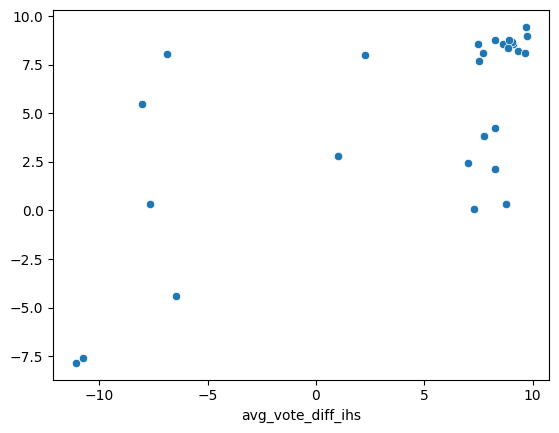

In [ ]:
# Scatterplot of predicted v. actual:
sns.scatterplot(x=y_test, y=y_hat_rf) # Predicted v Actual

In [ ]:
rf.score(X_test,y_test) # Rsq measure

0.447409592378038

In [ ]:
mse = mean_squared_error(y_test, y_hat_rf)
RMSE = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 5.276557296324533


given that the range for the vote diff is -10 to 10 i think that means theres a lot off on accuracy.

<Axes: xlabel='avg_vote_diff_ihs', ylabel='Density'>

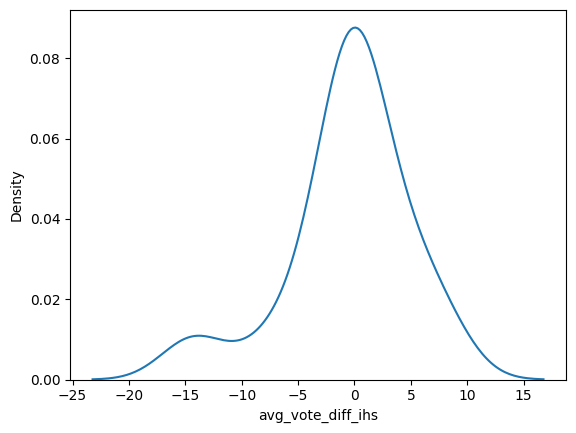

In [ ]:
# Residual plot:
residual = y_test - y_hat_rf
sns.kdeplot(x=residual)

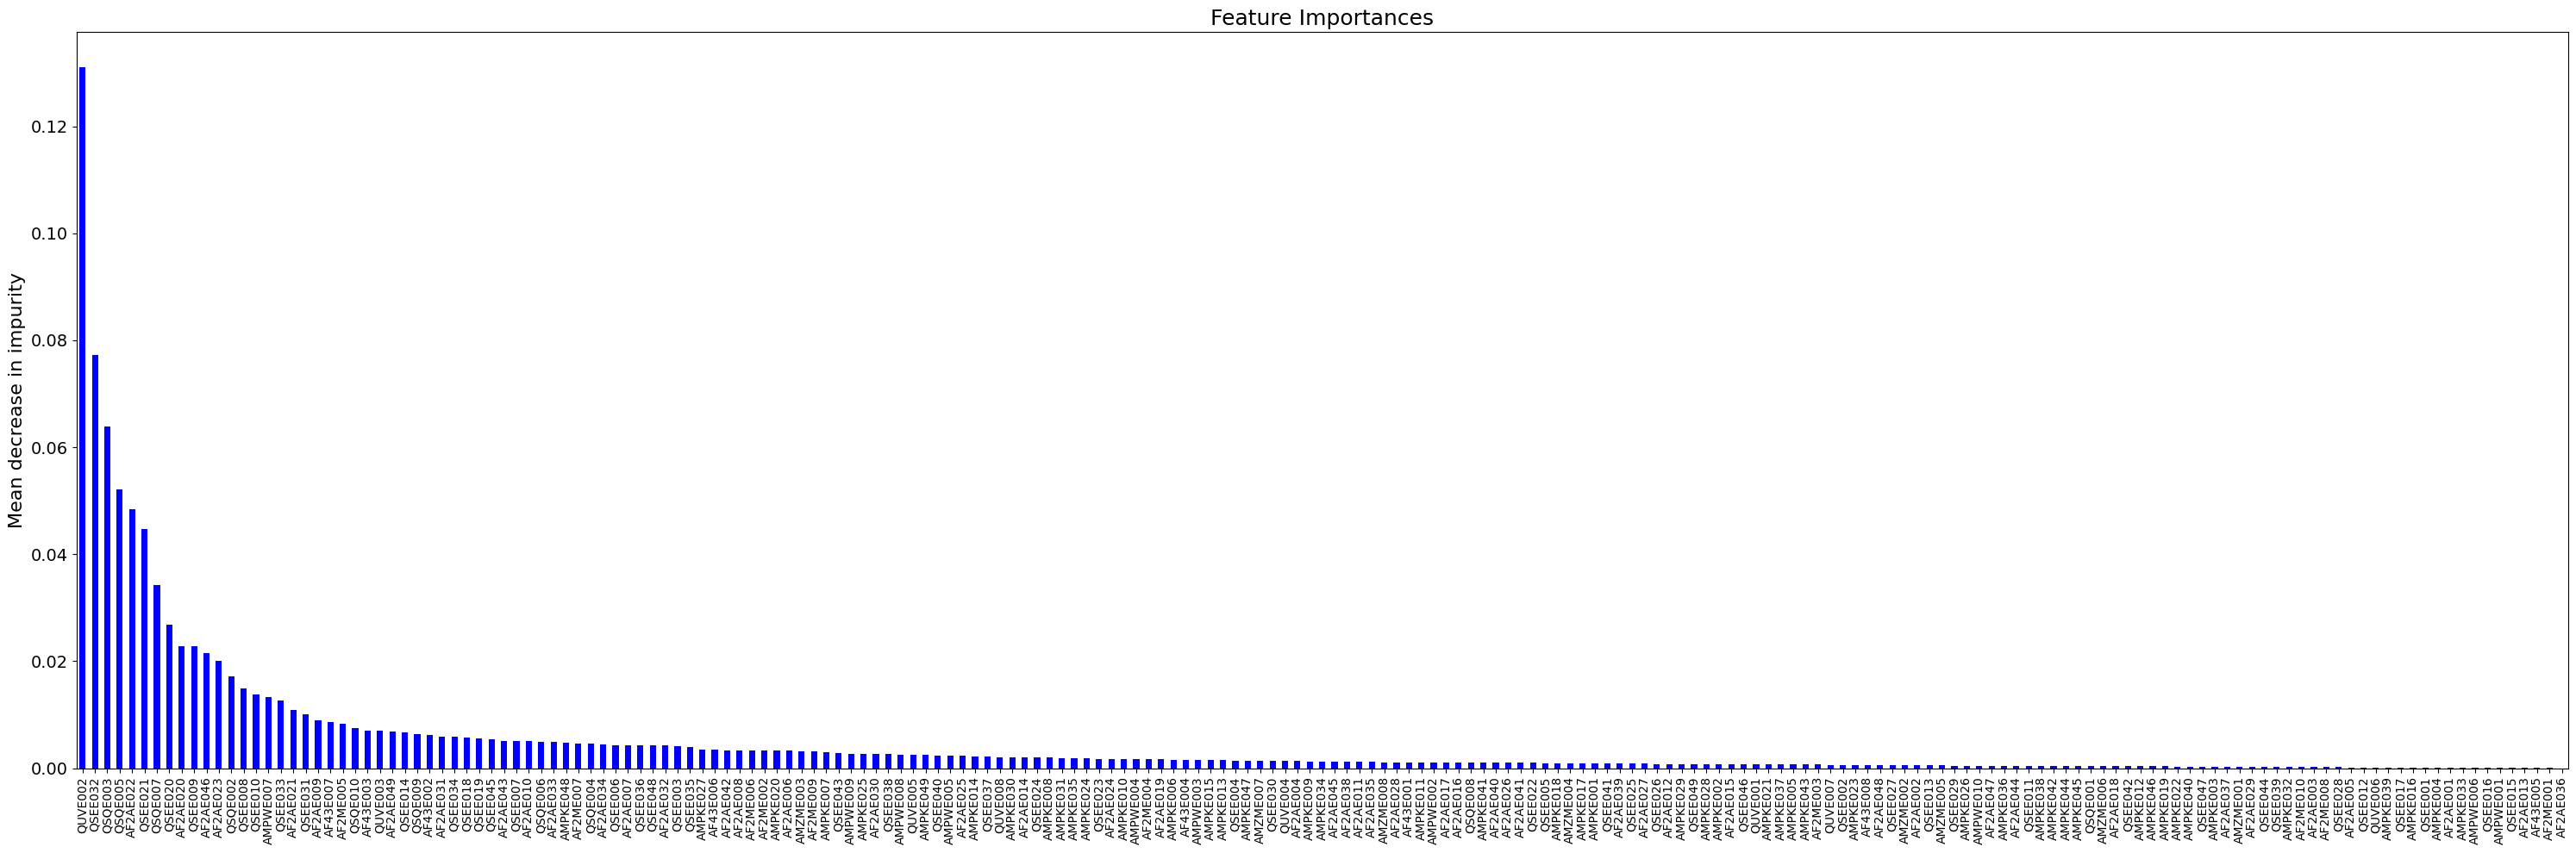

In [ ]:
#feauture importance plot
import matplotlib.pyplot as plt
import pandas as pd

forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
sorted_importances = forest_importances.sort_values(ascending=False)
plt.figure(figsize=(30, 10))

#feature importances with a bar chart
sorted_importances.plot(kind='bar', color='blue')

plt.title('Feature Importances', fontsize=18)
plt.ylabel('Mean decrease in impurity', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=14)

plt.tight_layout()

#export plot
plt.savefig('feature_importances.png', dpi=300)

plt.show()

Merging model back with geography dataframe to visualize model's prediction on virginia.

<Axes: title={'center': "Random Forest Model's Predictor for Avg Vote Difference (IHS)"}>

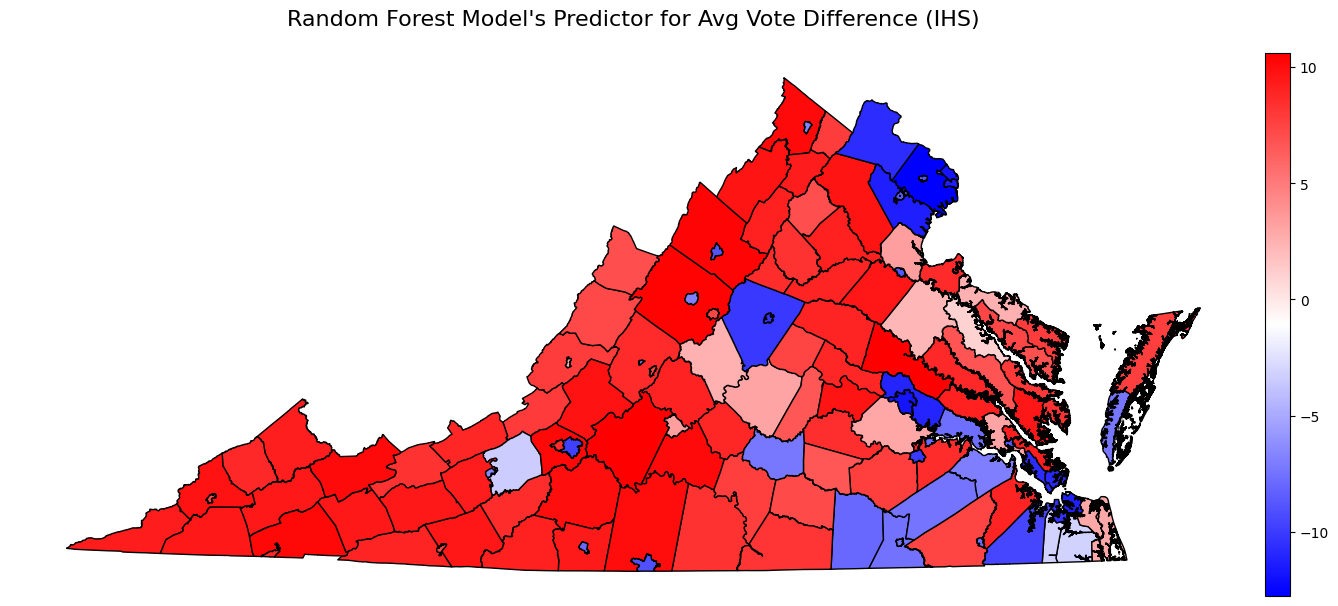

In [ ]:
#DataFrame from predictions and FIPS codes
predictions_df = pd.DataFrame({
    'FIPS': fips_test,  # FIPS codes corresponding to the test set
    'avg_vote_diff_ihs': y_hat_rf  # Predictions from the model
})

# Merge the geographic data with the predictions
result_df = pd.merge(geo_df, predictions_df, on='FIPS', how='left')

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
ax.set_title("Random Forest Model's Predictor for Avg Vote Difference (IHS)", fontsize=16, pad=20)
df.plot(ax=ax,column='avg_vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')


# Conclusion
From the intuitive performance of the random forest model, the Republican Party has broader geographical support in the described state, but the Democratic Party's support is mainly concentrated in key districts. The swing area is also very imporatant, since it may have great influence on the final voting result. For political parties, it's crucial to maintain current support by considering about people's need and own advantages. Besides, it's necessary to try best to get support from swing areas through targeted political compaigns.

### Strategies for Parties
1. Data-driven:
Using data analytics to constantly refine campaign strategies based on real-time feedback and dynamic changes. Investing in data operations can provide insights into voter sentiment and behavioral changes to enhance.
2. local engagement:
Both parties should strengthen local engagement strategies to build personal connections with voters and better understand their concerns.
3. social media and online activity:
Utilize social media to tailor online content and advertising to the interests and concerns of specific voter groups

### Limitation

1. Model accuracy:
* An R-square score of 0.447, while mid-range, indicates that the model fails to explain more than half of the variance, implying that key variables or interactions may be missing.
* The presence and distribution of residuals indicate a potential problem with model fitting, like the error variance may not be constant.

2. Missing values:
* There are around 1000 missing values exsiting when we merge the data set for each observation period.
* Missing data or inaccuracies in data collection can significantly affect the reliability of the predictions.
* non-response bias: for problems about personal prefernece of political party, some people may refuse to answer.

3. Set price of poverty:
* there's a varaiable we use in the model is ratio of income to poverty level. The poverty threshold is setted by government, and we suppose it depends on the annual performance of GDP or something else, which also means it could be changable every year. Based on the economic performance from the beggining of year that many things are keeping increasing prices, it's reasonable to believe the line of poverty level will change, which may reduce credibility of our model.

4. Views/opinons are changable:
* People's views on political party could change based on time or some specific news/events. It increases the difficulty of estimation accuracy.
* Also, there's possibility that people make the different choice in real voting compared to the census.

#### Possible Improvements

1. Model Enhancement:
Incorporating additional variables that capture more detailed aspects of voter behavior and preferences could improve model accuracy. For example, local economic conditions.
2. Data Collection:
Enhancing the dataset with more comprehensive data sources, such as more detailed voter history or applying social media sentiment analysis; it could provide new insights.